In [3]:
#Basic Imports
import numpy as np
import pandas as pd
# Reading data from csv file
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
data.head()

,PID,Date,Event
0,1028890,201101,2186
1,1028890,201101,7087
2,1028890,201101,4848
3,1028890,201101,2214
4,1028890,201102,7087


In [5]:
#Creating Month and Year feature
data["Date"]=data["Date"].astype(str)
data['Year'] = data['Date'].str[0:4]
data['Month'] = data['Date'].str[4:]

In [6]:
data = data.reset_index()

In [7]:
del data['index']

In [8]:
data.head()

,PID,Date,Event,Year,Month
0,1028890,201101,2186,2011,01
1,1028890,201101,7087,2011,01
2,1028890,201101,4848,2011,01
3,1028890,201101,2214,2011,01
4,1028890,201102,7087,2011,02


In [9]:
#Analysing the first letter of ICD-09 codes
data['Event'] = data['Event'].astype(str)
data['Events1'] = data['Event'].str[0]

In [10]:
#See total event occurencrs that start from a given number or word
data['Events1'].value_counts()

2    124852
3    124160
7    110749
8    108186
9    103709
4     42394
V     37908
6     27405
5     26852
J     19161
1     18870
E      5433
A      5059
G      4541
Q      1988
S      1282
0      1217
T       895
C       632
L       507
H       348
K       243
B       191
P       137
D        50
R        13
M         5
Name: Events1, dtype: int64

In [11]:
#Initial imports alongwith visualisation
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

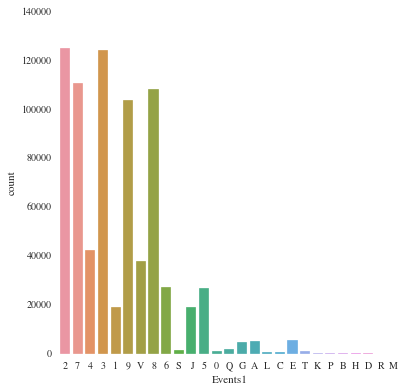

In [12]:
#Visualise total number of events that start from given number or letter code. One important inference was that 
#E,V and S were the only prominent letter codes occuring. This was important as ICD-09 codes only have E and V 
#categories that start from alphabets and rest were ICD-10 code letters. They may be removed and their removal may not 
#affect the performance of the model.Another observation was 2,3,6,7,8 were most observed categories.
sns.factorplot('Events1',data=data,kind ="count",size=6)

In [13]:
#Map leeter code for graphical purpose
data['Events1'] = data['Events1'].map({'1': 1, '2': 2, '3': 3, '4': 4, '5': 5,'6':6,'7':7,'8':8,'9':9,'A':10,'B':12,'C':13,'D':14,'E':15,'G':16,'H':17,'J':18,'K':19,'L':20,'M':21,'0':0,'P':22,'Q':23,'R':24,'S':25,'V':26})

In [14]:
# Create a crosstab between first letter occurence of Event and different Months. We see that there is no specific preference 
# of Events or onth and hence no specific weight for any event in any month is required.However,recent events may lead to 
#more weightage to recent months
table = pd.crosstab(data['Events1'],data['Month'])

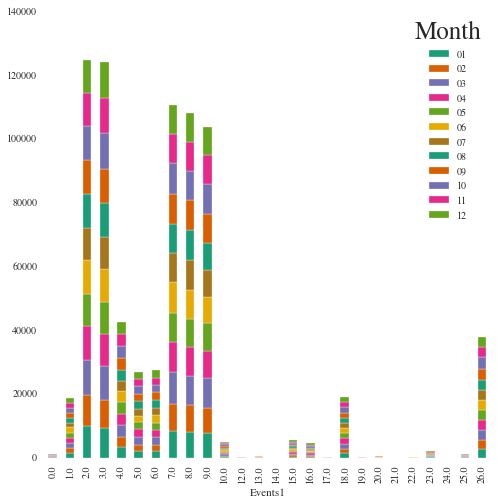

In [15]:
#Stacked Charts for categorical vs categorical variable visualisation
table.plot(kind="bar",figsize=(8,8),stacked=True)

In [16]:
table

Month,01,02,03,04,05,06,07,08,09,10,11,12
Events1,,,,,,,,,,,,
0.0,89,96,118,107,85,96,112,98,146,102,75,93
1.0,1544,1446,1701,1568,1568,1644,1452,1477,1641,1619,1606,1604
2.0,10035,9552,11202,10505,10181,10464,10240,10571,10596,10666,10286,10554
3.0,9265,8932,10654,10018,9841,10395,10082,10587,10839,11161,11140,11246
4.0,3274,3183,3779,3610,3569,3374,3278,3414,3683,3766,3763,3701
5.0,1989,2035,2436,2409,2171,2172,2166,2454,2227,2327,2202,2264
6.0,2109,1903,2456,2221,2307,2388,2316,2483,2385,2233,2313,2291
7.0,8369,8507,9929,9370,9203,9750,8925,9361,9374,9526,9280,9155
8.0,8113,8273,9383,8960,8751,9157,9355,9303,9373,9321,8922,9275
